<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Solutions_Assigment_1_pathmnist_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Assignment 1: Convolutional Neural Networks (CNN) for Computer Vision**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)



# **The Purpose of Assignments**

In this course, **_Assignments_** are designed to help me (and you) assess your ability to transfer knowledge gained in completing class coding exercises to solving more realistic problems.

Assignments play a pivotal role in reinforcing your learning, as they require you to apply theoretical concepts to practical scenarios. This helps solidify your understanding and enhances your problem-solving skills. By tackling these assignments independently, you develop critical thinking and the ability to synthesize information from various sources. Moreover, assignments encourage you to explore topics more deeply, fostering intellectual curiosity and promoting a deeper engagement with the subject matter. Ultimately, these assignments are not just a measure of your learning, but a means to equip you with the skills needed for real-world applications and future challenges.

### Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


### Define functions

The cell below creates several functions that are needed for this assignment. If you don't run this cell, you will receive errors later when you try to run some cells.

In [2]:
# Create functions for this lesson

import psutil
import os

def check_current_ram():
  ram = psutil.virtual_memory()
  print(f"Available RAM: {ram.available / (1024 ** 3):.2f} GB")

def list_files():
   files = os.listdir('.')
   print(f"Current files: {files}")

def list_extract():
  files = os.listdir(EXTRACT_TARGET)
  print(f"Current files in EXTRACT_TARGET: {files}")

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


In [3]:
list_files()

Current files: ['.config', 'drive', 'sample_data']


### Record your specific GPU/TPU accelerator

You will need to record what hardware you will be using in this Assignment by entering the appropiate value in the `my_GPU_dict` below.

In [4]:
# Record your current Runtime GPU/TPU


# List of Current GPU/TPUs
my_GPU_dict = {
    1: 'CPU',
    2: 'A100 GPU',
    3: 'L4 GPU',
    4: 'T4 GPU',
    5: 'TPU v2-8'
}

# Enter the correct key number in the square brackets [ ]
my_GPU = my_GPU_dict[3]

# Print selection
print(f"My current runtime GPU/TPU is: {my_GPU}")

My current runtime GPU/TPU is: L4 GPU


If your code is correct, you should see something like the following:
~~~text
My current runtime GPU/TPU is: L4 GPU
~~~

In some situations, it will be helpful to the Instructor to know your hardware environment when trying to help you resolve coding problems.

# **Assigment 1: Keras Neural Networks for Medical MNIST**

**Assignment 1** is pecifically designed to assess your ability to write the Python/Tensorflow/Keras code necessary to classify image data in a MedMNIST dataset. This assignment is designed so that you can re-use the code in **Class_06_1**
. The same series of steps used in both the Example and the **Exercise** in Class_06_1, are provided in this assignment.

For the most part, the code in Class_06_1 should be reusable here. BUT, since the MedMNSIT datafiles vary in scale (see below), it will be up to you to troubleshoot errors when they come up. You Instructor is more than happy to help you when you encounter an error that you can figure out.


## **MedMNIST Datasets**

**MedMNIST** offers a collection of 12 pre-processed 2D datasets designed for various biomedical image classification tasks1
. These datasets cover primary data modalities such as **X-Ray**, **OCT (Optical Coherence Tomography)**, **Ultrasound**, **CT (Computed Tomography)**, and **Electron Microscope** images.

The datasets are diverse, ranging from binary/multi-class classification to ordinal regression and multi-label tasks. They also vary in scale, with data sizes ranging from 100 to 100,000 images.

Here's a list of the 12 2D datasets offered by MedMNIST, along with their names and the classes they contain:

| Dataset Name       | Classes                         |Datafile Name
|--------------------|---------------------------------|--------------|
| DermaMNIST         | 7 (skin conditions)   |dermamnist_64.npz
| OCTMNIST           | 10 (retinal layers)   |octmnist.npz
| PneumoniaMNIST     | 2 (normal, pneumonia) |pneumoniamnist_64.npz
| RetinaMNIST        | 5 (retinal diseases)  |retinamnist_128.npz
| MammographyMNIST   | 2 (benign, malignant) |breastmnist_224.npz
| PathMNIST          | 9 (histopathological conditions) |pathmnist_128.npz
| BloodMNIST         | 8 (blood cell types)  |bloodmnist_128.npz
| TissueMNIST        | 7 (tissue types)   |tissuemnist.npz
| OrganMNIST - A     | 9 (organs -axial view)   |organamnist.npz
| OrganMNIST - C     | 9 (organs - coronal view)   |organcmnist.npz
| OrganMNIST - S     | 9 (organs - saggital view) |organsmnist.npz
| CellMNIST          | 5 (cell types)                      |
| UltrasoundMNIST    | 3 (ultrasound views)                |

# **Your Assignmment 1 Dataset**

The last digit in your myUTSA ID (e.g. 'abc123`) will determine which MedMNIST dataset you are to analyze for **Assignment 1**.

**WARNING!** You are not free to choose any dataset for Assignment 1. If analyze the wrong dataset, _30 points_ will be immediately deducted from your score. If you are uncertain which dataset you should be working on, contact your Instructor for help.


| Last Digit in my UTSA ID | MedMNIST Dataset to Analyze
---------------------------|--------------------------------
0                          | breastmnist_224.npz
1                          | chestmnist.npz
2                          | octmnist.npz
3                          | organamnist.npz
4                          | organcmnist.npz
5                          | organsmnist.npz
6                          | pathmnist_128.npz
7                          | pneumoniamnist_64.npz
8                          | retinamnist_128.npz
9                          | tissuemnist.npz



### **Step - 1: Setup Evironmental Variables**

In the cell below, create environmental variables so you can download your specific MedMNIST dataset that has been assigned to you in the cell above.

It is assumed that you will want to use the code provided in Class_06_1 as a template for this assignment. If you use the code from Step 1 in Class_06_1, you will only need to make changes to the `DOWNLOAD_SOURCE` and the `EXTRACT_TARGET`.

For your `EXTRACT_TARGET` you should use the file name of the MedMNIST assigned to you in the cell above, exactly as it is written.

For example, if the last digit of your myUTSA ID was `6`, your `DOWNLOAD_SOURCE` would be:
~~~text
DOWNLOAD_SOURCE = URL+"/pathmnist_224.npz"
~~~
and your `EXTRACT_TARGET` would be:
~~~text
EXTRACT_TARGET = os.path.join(PATH,"pathmnist_224")
~~~


In [5]:
# Step - 1: Setup Environmental Variables

import os

# Define datafile location
URL = "https://biologicslab.co/BIO1173/data"
DOWNLOAD_SOURCE = URL+"/pathmnist_128.npz"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print(f"DOWNLOAD_SOURCE {DOWNLOAD_SOURCE}")
print(f"DOWNLOAD_NAME {DOWNLOAD_NAME}")

# Define folder locations to store the data
PATH = "/content"
EXTRACT_TARGET = os.path.join(PATH,"/pathmnist_128")
SOURCE = os.path.join(EXTRACT_TARGET)
TARGET = SOURCE

# Print out environmental variables
print(f"PATH {PATH}")
print(f"EXTRACT_TARGET {EXTRACT_TARGET}")
print(f"SOURCE {SOURCE}")
print(f"TARGET {TARGET}")

DOWNLOAD_SOURCE https://biologicslab.co/BIO1173/data/pathmnist_128.npz
DOWNLOAD_NAME pathmnist_128.npz
PATH /content
EXTRACT_TARGET /pathmnist_128
SOURCE /pathmnist_128
TARGET /pathmnist_128


### **Step - 2: Download and Extract Data**

If your code in Step 1 is correct, you should be ready to download and extract your dataset.

In the cell below, write the code to download your datafile, make the appropiate file folders and then extract (unzip) your datafile into the file folders you created.

**Please Note:** There is considerable differences in the size of these MedMNIST datasets. The larger ones (e.g. `pathmnist_224.npz`) are more than 12GB in size and will require many minutes to upload to Colab and then to extract it. So you will need to be patient. As long as the "little wheel" at the top left of the code cell keeps spinning, your code is working correctly.

In [6]:
# Step 2

import os

print("Creating necessary directories...", end='')
# Create necessary directories
os.makedirs(SOURCE, exist_ok=True)
os.makedirs(EXTRACT_TARGET, exist_ok=True)
print("done.")

print("Downloading files...", end='')
# Define paths and URLs
download_path = os.path.join(PATH, DOWNLOAD_NAME)
extract_path = os.path.join(EXTRACT_TARGET, DOWNLOAD_NAME)

# Download the file
os.system(f"wget -O {download_path} {DOWNLOAD_SOURCE}")
print("done.")

print("Extracting files...", end='')
# Extract the file
os.system(f"unzip -o -d {EXTRACT_TARGET} {download_path} >/dev/null")
print("done.")


Creating necessary directories...done.
Extracting files...done.


### **Step - 3: Load and Shuffle Images and Labels into Numpy arrays**

In the cell below, write the Python code to read (load) and shuffle the image and label data into Numpy arrays. In total, you should create the following 6 numpy arrays: `train_X`, `train_Y`, `test_X`, `test_Y`, `val_X` and `val_Y`. The `X` arrays will have the images, the `Y` arrays will have their corresponding labels.

Make sure to print out the `shape` of each numpy array.   

In [7]:
# Insert your code for Step 3 here

import numpy as np

# Set the random seed
#np.random.seed(42)

# Unpack and shuffle train_images
train_images = np.load(os.path.join(SOURCE,"train_images.npy"),)
train_labels = np.load(os.path.join(SOURCE,"train_labels.npy"),)
combined = list(zip(train_images, train_labels))
np.random.shuffle(combined)
train_X, train_Y = zip(*combined)
train_X = np.array(train_X)
train_Y = np.array(train_Y)
print(f"train_X: {train_X.shape}")
print(f"train_Y: {train_Y.shape}")

# Unpack and shuffle test_images
test_images = np.load(os.path.join(SOURCE,"test_images.npy"),)
test_labels = np.load(os.path.join(SOURCE,"test_labels.npy"),)
combined = list(zip(test_images, test_labels))
np.random.shuffle(combined)
test_X, test_Y = zip(*combined)
test_X = np.array(test_X)
test_Y = np.array(test_Y)
print(f"test_X: {test_X.shape}")
print(f"test_Y: {test_Y.shape}")

# Unpack and shuffle val_images
val_images = np.load(os.path.join(SOURCE,"val_images.npy"),)
val_labels = np.load(os.path.join(SOURCE,"val_labels.npy"),)
combined = list(zip(val_images, val_labels))
np.random.shuffle(combined)
val_X, val_Y = zip(*combined)
val_X = np.array(val_X)
val_Y = np.array(val_Y)
print(f"val_X: {val_X.shape}")
print(f"val_Y: {val_Y.shape}")

train_X: (44998, 128, 128, 3)
train_Y: (44998, 1)
test_X: (3590, 128, 128, 3)
test_Y: (3590, 1)
val_X: (5002, 128, 128, 3)
val_Y: (5002, 1)


Take a good look at your output. Make a note of the `shape` value for the array called `train_X`.

The `shape` should have 4 numbers. The first number is the number of images in your particular dataset. The next 2 numbers are the dimensions (in pixels) of the image and the last number specifies the number of color channels. The number `3` means a color image (RGB).

**You will need to know these 4 numbers later in your analysis.** Please note that these values vary significantly between the different datasets.

### **Step 4 - Add Color Channel and Resize Images**

In [8]:
import numpy as np
import tensorflow as tf

# Add a color channel if not already present
if train_X.ndim == 4:
    print("No need to add a color channel, images are RGB")
else:
    print("Adding monochrome color channel...", end='')
    train_X = np.expand_dims(train_X, axis=-1)
    test_X = np.expand_dims(test_X, axis=-1)
    val_X = np.expand_dims(val_X, axis=-1)
    print("done")

# Resize images if they are less than 64 pixels
if train_X.shape[1] >= 64:
    print("No need to resize images--already 64x64 (or more) pixels")
    train_X_resized = train_X
    test_X_resized = test_X
    val_X_resized = val_X
else:
    print("Resizing images to 64x64 pixels...", end='')
    train_X_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in train_X])
    test_X_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in test_X])
    val_X_resized = np.array([tf.image.resize(img, (64, 64)).numpy() for img in val_X])
    print("done")

# Copy back
train_X = np.copy(train_X_resized)
test_X = np.copy(test_X_resized)
val_X = np.copy(val_X_resized)

# Check shapes
print(train_X.shape)
print(test_X.shape)
print(val_X.shape)


No need to add a color channel, images are RGB
No need to resize images--already 64x64 (or more) pixels
(44998, 128, 128, 3)
(3590, 128, 128, 3)
(5002, 128, 128, 3)


In [9]:
# Check available memory

import psutil

# Get the memory details
mem = psutil.virtual_memory()

# Print total, available, and used memory
print(f"Total Memory: {mem.total / (1024 ** 3):.2f} GB")
print(f"Available Memory: {mem.available / (1024 ** 3):.2f} GB")
print(f"Used Memory: {mem.used / (1024 ** 3):.2f} GB")


Total Memory: 52.96 GB
Available Memory: 43.35 GB
Used Memory: 8.98 GB


### **Step - X: Augment Training Image Set**

In the cell below, write the code to augment your set of training images (`train_X`)  

In [10]:
import numpy as np
import psutil

# Get the memory details
mem = psutil.virtual_memory()

# Don't augment if available memory isn't sufficient
if mem.available <= mem.used:
    print(f"Available memory ({mem.available / (1024 ** 3):.2f} GB) might not be enough to augment train_X")
    print(f"Number of train_X images: {train_X.shape[0]}")
else:
    print(f"Available memory ({mem.available / (1024 ** 3):.2f} GB) should be enough to augment train_X")
    print("Augmenting the number of images in train_X...", end=' ')

    # Initialize lists to store the augmented images and labels
    augmented_images = []
    augmented_labels = []

    # Iterate through each image and its corresponding label
    for img, label in zip(train_X, train_Y):
        # Original image
        augmented_images.append(img)
        augmented_labels.append(label)

        # Vertically flipped image
        augmented_images.append(np.flipud(img))
        augmented_labels.append(label)

        # Horizontally flipped image
        augmented_images.append(np.fliplr(img))
        augmented_labels.append(label)

    # Convert lists back to numpy arrays
    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)

    print("done")
    print(f"Original number of train_X images: {len(train_X)}")
    print(f"Augmented number of train_X images: {len(augmented_images)}")

    # Copy images back
    train_X = np.copy(augmented_images)
    train_Y = np.copy(augmented_labels)
    train_Y = np.copy(augmented_labels)


Available memory (43.33 GB) should be enough to augment train_X
Augmenting the number of images in train_X... done
Original number of train_X images: 44998
Augmented number of train_X images: 134994


### **Step - 4: One-Hot Encode Labels**

In the cell below, use the Keras function `to_categorical()` to One-Hot Encode the label information for your training, testing and validation images. Make sure to print out the `shapes` of your arrays after One-Hot Encoding, Their shape should match as the new number of classes in your dataset. Many of the MedMNIST datasets have only 2 classes, while other datasets have more than 10.

In [11]:
# Insert your code for Step - 4 here

from tensorflow.keras.utils import to_categorical
import numpy as np

# Determine the number of classes
classes, counts = np.unique(test_Y, return_counts=True)
class_count = len(classes)
print(f"The label data contains {class_count} classes")

train_Y = to_categorical(train_Y, num_classes=class_count)
test_Y = to_categorical(test_Y, num_classes=class_count)
val_Y = to_categorical(val_Y, num_classes=class_count)

print(f'Train Labels Shape (train_Y): {train_Y.shape}')
print(f'Test Labels Shape (test_Y): {test_Y.shape}')
print(f'Validation Labels Shape (val_Y): {val_Y.shape}')



The label data contains 9 classes
Train Labels Shape (train_Y): (134994, 9)
Test Labels Shape (test_Y): (3590, 9)
Validation Labels Shape (val_Y): (5002, 9)


Check your ouput after performing One-Hot Encoding. The second shape number should be the same as the number of classes. Here is a correct example:

~~~text
The label data contains 8 classes
Train Labels Shape (train_Y): (496398, 8)
Test Labels Shape (test_Y): (47280, 8)
Validation Labels Shape (val_Y): (23640, 8)
~~~

##### **WARNING:** If your output shows 3 numbers instead of 2 after the arrays with label as shown in this example, **Do not proceed!**
~~~text
The label data contains 2 classes
Train Labels Shape (train_Y): (496398, 8, 2)
Test Labels Shape (test_Y): (47280, 8, 2)
Validation Labels Shape (val_Y): (23640, 8, 2)
~~~

The presence of a third number means that you have One-Hot encoded the data more than once. If you try to use this data, your model will crash during training. You need to go back to Step 1 and start over.

### **Step - 5: Create and Compile CNN neural network model**

In the cell below, build a convolutional neural network (CNN) model to classify the images in your particular dataset into one of the different classes.

Use the code for the CNN models shown in Step 5 of Class_06_1 as a template.

### **Setting the `input_dim`**

In a CNN model, `input_dim` refers to the dimensions of the input data that the model will process. It includes the height, width, and number of channels (color depth) of the images. For example, if you’re working with RGB images of size 64x64 pixels, the input_dim would be (64, 64, 3). This ensures that the model architecture matches the shape of your data. It’s the initial layer's responsibility to match this input shape, setting the stage for the entire convolutional process

It is up to you to set the correct values for the `input_dim`. These values were printed out in **Step X**.

**IMPORTANT WARNING:**

Probably the most common error students encounter in creating a CNN model is putting in the wrong input dimensions (`input_dim`). If your crashes almost immediately after you start training, it is probably due to the wrong values for the `input_dim` variable.

### **Setting the `learning_rate`**

Choosing the optimal learning rate for a CNN involves some experimentation and fine-tuning. You can start with a learning rate = 0.0001. If training proceeds smoothly, that's great. However, if encounter a problem you could increase or decrease the learning rate to see if that resolves the issue.


In [12]:
# Example Step - 5: Construct and compile CNN model


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import numpy as np

# Define input_dim: Must be the pixel size of your images
input_dim = (128, 128, 3)

# Sete learning rate
learning_rate = 0.0001

# Set Persistance
PATIENCE=10

# Create CNN model
model = Sequential([
    # Input Layer
    Input(shape=input_dim),

    # 1st Convolution layer
    Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    # 2nd Convolution layer
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # 3rd Convolution layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # 4th Convolution layer
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.5),

    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.5),

    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    BatchNormalization(),

    # Output layer has neurons equal to class_count
    Dense(class_count, activation='softmax')
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# Create early stopping monitor
e_stop_monitor = EarlyStopping(monitor='val_loss',
                 min_delta=1e-3, patience=PATIENCE,
                 verbose=1, mode='auto',
                 restore_best_weights=True)

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 63, 63, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 2,464,873 (9.40 MB)

 Trainable params: 2,463,369 (9.40 MB)

 Non-trainable params: 1,504 (5.88 KB)

### **Step - 6: Train the Neural Network**

In the cell below, write the Python code to train the neural network that you constructed and compiled above.

Set your number of EPOCHS to 100. When it comes to BATCH_SIZE, set it either to `64` or `128`.

### **Setting the `BATCH_SIZE`**

Batch size in a CNN (or any neural network) refers to the number of training examples used in one forward and backward pass through the network.

##### **Why It Matters:**
* **Memory Management:** Larger batch sizes can make better use of your GPU's memory, leading to faster training times. However, they require more memory.
* **Gradient Estimates:** Smaller batch sizes provide noisier estimates of the gradient, which can help the model escape local minima and potentially improve generalization.
* **Training Speed:** Larger batches tend to converge faster in terms of iterations but might take longer in terms of wall-clock time due to the increased computations.

##### **Choosing Batch Size:**
* Common choices are powers of 2 (e.g., 32, 64, 128), as they align well with memory allocation in hardware.

* Experiment with different sizes to see what works best for your specific dataset and model architecture.

The sweet spot for batch size often depends on your specific hardware and dataset, so some experimentation is usually required.

### **Setting the `steps_per_epoch`**

**steps_per_epoch** defines how many batches of data the model will train on in one epoch. The optimal step size is equal to the number of images in `train_X` divided by the batch size. In the code below, the `STEPS_PER_EPOCH` is set automatically using the following code chunk:

~~~text
STEPS_PER_EPOCH = len(train_X) // BATCH_SIZE
~~~



In [13]:
# Insert your code for Step - 6

import time
import tensorflow as tf
import numpy as np

# Set variables
EPOCHS = 100
BATCH_SIZE = 64
STEPS_PER_EPOCH = len(train_X) // BATCH_SIZE

# Record start time
start_time = time.time()

# Print header
print(f"----- Training is starting for {EPOCHS} epochs, batch size: {BATCH_SIZE}, steps per epoch: {STEPS_PER_EPOCH}, runtime GPU/TPU: {my_GPU} --------------")

# Train the model
history = model.fit(train_X, train_Y,
                    validation_data=(val_X, val_Y),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    callbacks=[e_stop_monitor])


# Record end time
elapsed_time = time.time() - start_time

# Print elapsed time
print(f"Elapsed time: {hms_string(elapsed_time)}")


----- Training is starting for 100 epochs, batch size: 64, steps per epoch: 2109, runtime GPU/TPU: L4 GPU --------------
Epoch 1/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.5748 - loss: 2.6334 - val_accuracy: 0.3637 - val_loss: 5.1811
Epoch 2/100
   1/2109 ━━━━━━━━━━━━━━━━━━━━ 6:55:03 12s/step - accuracy: 0.6111 - loss: 2.0632

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2109/2109 ━━━━━━━━━━━━━━━━━━━━ 12s 140us/step - accuracy: 0.6111 - loss: 2.0632 - val_accuracy: 0.3619 - val_loss: 5.2294
Epoch 3/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.7828 - loss: 1.4836 - val_accuracy: 0.3407 - val_loss: 6.4936
Epoch 4/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.9444 - loss: 0.8740 - val_accuracy: 0.3429 - val_loss: 6.5525
Epoch 5/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8521 - loss: 0.9660 - val_accuracy: 0.4224 - val_loss: 4.8927
Epoch 6/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.8333 - loss: 0.9945 - val_accuracy: 0.4162 - val_loss: 4.9535
Epoch 7/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8863 - loss: 0.6970 - val_accuracy: 0.5146 - val_loss: 3.8260
Epoch 8/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step - accuracy: 0.8889 - loss: 0.6522 - val_accuracy: 0.5158 - val_loss: 3.8088
Epoch 9/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9142 - lo

If you used the `L4 GPU`, your output should be similar to the following:

First  Epoch....
~~~text
----- Training is starting for 100 epochs, batch size: 64, steps per epoch: 2109, runtime GPU/TPU: L4 GPU --------------
Epoch 1/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.5748 - loss: 2.6334 - val_accuracy: 0.3637 - val_loss: 5.1811
~~~

Last Epochs...
~~~text
Epoch 48/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 0s 135us/step - accuracy: 1.0000 - loss: 0.0962 - val_accuracy: 0.9010 - val_loss: 0.3779
Epoch 49/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9744 - loss: 0.1505 - val_accuracy: 0.8984 - val_loss: 0.4325
Epoch 50/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 0s 134us/step - accuracy: 0.9444 - loss: 0.1967 - val_accuracy: 0.8806 - val_loss: 0.5138
Epoch 51/100
2109/2109 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.9759 - loss: 0.1473 - val_accuracy: 0.8369 - val_loss: 0.6228
Epoch 51: early stopping
Restoring model weights from the end of the best epoch: 41.
Elapsed time: 0:11:00.46
~~~

With the `L4 GPU`, the total training time was about 11 minutes. Just using the standard `CPU` runtime, the training time will be more than 3 hours.

## **Evaluating Model's Training**

Now that we have trained our model, let's look at how it changed during its training.

### Example: Plot `accuracy` and `val_accuracy`

The code in the cell below plot's the `accuracy` and the `val_accuracy` recorded during each epoch in the training cycle. As you can see, `accuracy` and the `val_accuracy` increase during training as model adjusts its synaptic weights to improve its classification precision after each epoch.

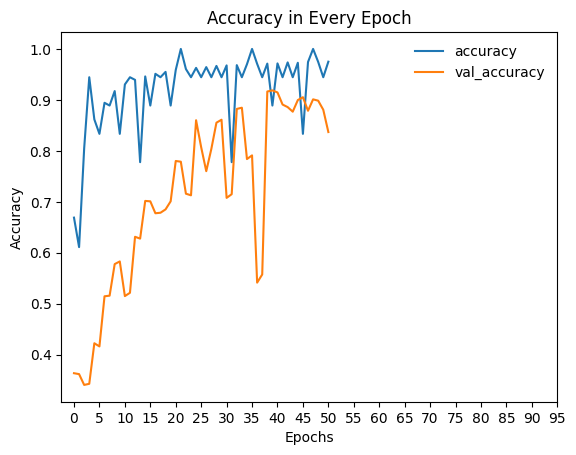

In [14]:
# Example: Plot accuracy and val_accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], frameon=False)
plt.xticks(np.arange(0,100, 5))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy in Every Epoch')
plt.show()

If the code is correct, you should see the following plot:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image18.png)

In training a neural network, `accuracy` and `val_accuracy` represent different performance metrics:

* **Accuracy:** This measures how well the model is performing on the training data. It calculates the percentage of correct predictions out of the total predictions made during training.

* **Val_accuracy:** This measures how well the model is performing on the validation data, which is separate from the training data. It calculates the percentage of correct predictions out of the total predictions made on the validation set. This metric helps you understand how well the model generalizes to new, unseen data.

In short, `accuracy` tells you how well the model is learning from the training data, while `val_accuracy` tells you how well the model is expected to perform on new data.

#### **Why is `val_accuracy` so erratic near the end of training?**

That's likely a sign of overfitting. When the model performs well on the training data (`accuracy`) but poorly on the validation data (`val_accuracy`), it means it's learning the noise and details in the training set rather than generalizing from the patterns.

Overfitting often results in unstable validation accuracy because the model's predictions are more influenced by the peculiarities of the training data, leading to fluctuating performance on new, unseen data. Reducing the complexity of the model, adding regularization techniques, or gathering more training data can help mitigate this.

In [15]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set
predictions = model.predict(test_X)

# Convert probabilities to class labels (if necessary)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_Y, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy on validation set: {accuracy:.2f}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy on validation set: 0.78


### Example: Plot Image with Label

The code in the cell below reads the data for one image from the Numpy array `test_images` and its corresponding label from `test_labels` and displays the data as an image.

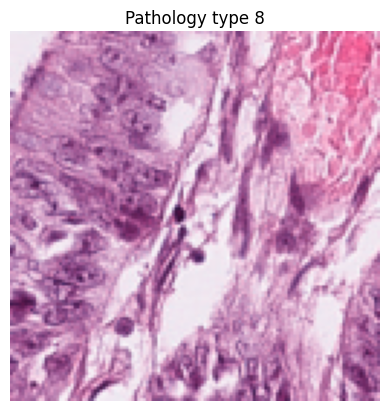

In [16]:
# Example: Plot 1 image with label
import matplotlib.pyplot as plt
import numpy as np

# Define test image number
img_num=10

# Select image
image = test_X[img_num]

# Display the image
plt.imshow(image)
plt.title('Pathology type ' + str(np.argmax(test_Y[img_num])))
plt.axis('off')  # Hide the axis
plt.show()


If the code is correct, you should see the following image:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image53.png)


You can easily look at other images by simply changing the image number variable, `img_num`.

### Example: Plot 4 Frames with Label

The code in the cell below generates a 2 X 2 plot showing 4 images from the training dataset along with their labels.

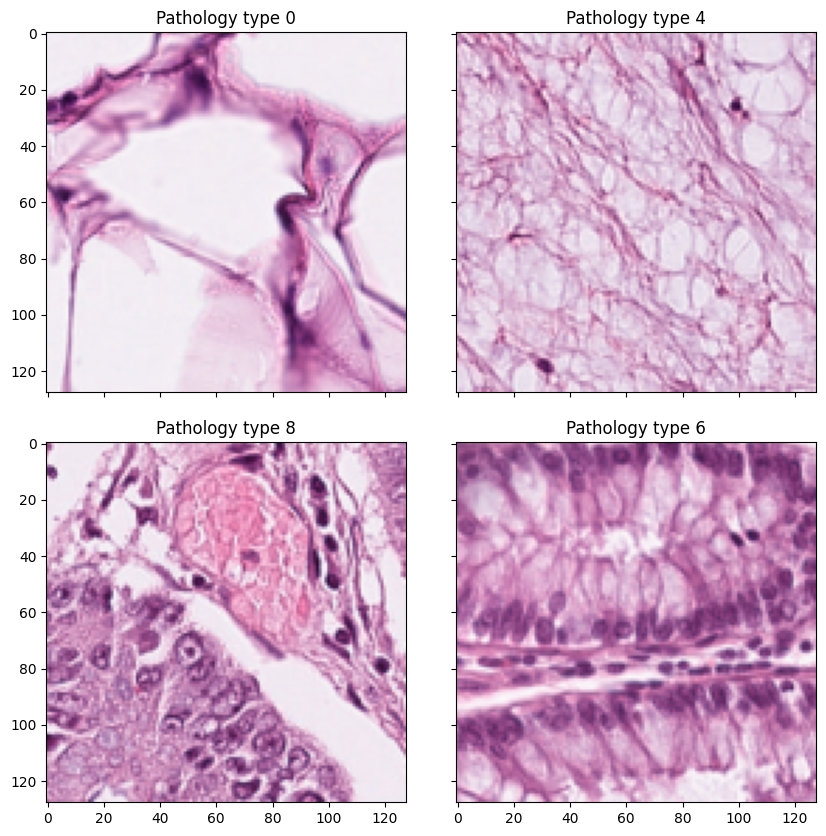

In [17]:
# Example: Plot 4 frames with label

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid


# Set figure size
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2,2),
        axes_pad=0.5
)

# Plot 4 images
for x in range(0,4):
    grid[x].set_title('Pathology type ' + str(np.argmax(test_Y[x])))
    grid[x].imshow(test_X[x])


If the code is correct, you should see something similar to the following:


![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image19.png)

The figure shows 4 pictures from the `test_images` with their blood cell type shown in the image title.


# Other Resources

* [Imagenet:Large Scale Visual Recognition Challenge 2014](http://image-net.org/challenges/LSVRC/2014/index)
* [Andrej Karpathy](http://cs.stanford.edu/people/karpathy/) - PhD student/instructor at Stanford.
* [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/) - Stanford course on computer vision/CNN's.
* [CS231n - GitHub](http://cs231n.github.io/)
* [ConvNetJS](http://cs.stanford.edu/people/karpathy/convnetjs/) - JavaScript library for deep learning.

## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Assignment_01.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.